In [82]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'

df = pd.read_csv(url, index_col = 0)

In [83]:
df.dtypes
df.replace('-', np.nan, inplace=True)
df = df.iloc[:,:].astype(float)
df = df.loc[:, df.columns != 'n']

df

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
13,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


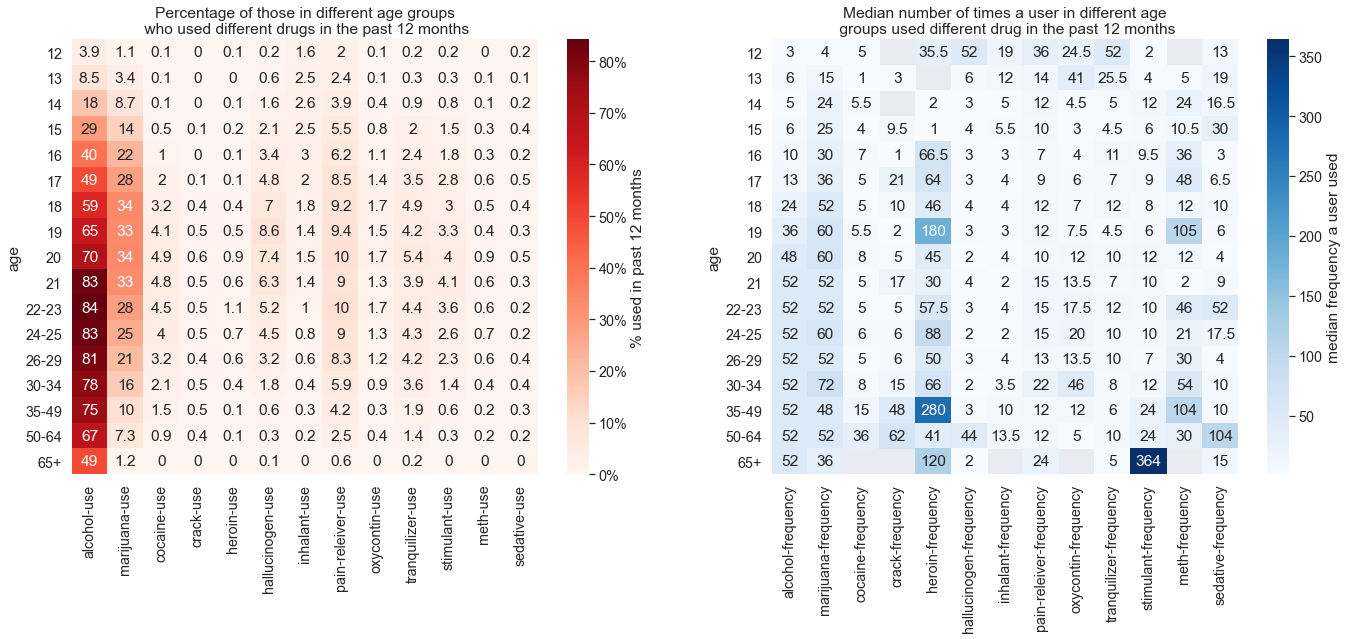

In [84]:
sb.set(font_scale=1.3)

fig, axes = plt.subplots(1,2, figsize=(23, 8))

fig.subplots_adjust(wspace=0.2)
#fig.colorbar(ax.collections[0], ax=ax,location="right", use_gridspec=False, pad=0.2)
#plt.figure(figsize=(16, 16))
df_percentage = df.iloc[:,range(0,26,2)]
axes[0].set_title("Percentage of those in different age groups\n who used different drugs in the past 12 months")
plot_precentage = sb.heatmap(df_percentage, annot = True, cmap='Reds', ax=axes[0], cbar_kws={'format': '%.0f%%', 'label': '% used in past 12 months'})
df_frequency = df.iloc[:,range(1,27,2)]
axes[1].set_title("Median number of times a user in different age\n groups used different drug in the past 12 months")
plot_frequency = sb.heatmap(df_frequency, annot = True, fmt='g', cmap='Blues', ax=axes[1], cbar_kws= dict(label = 'median frequency a user used'))



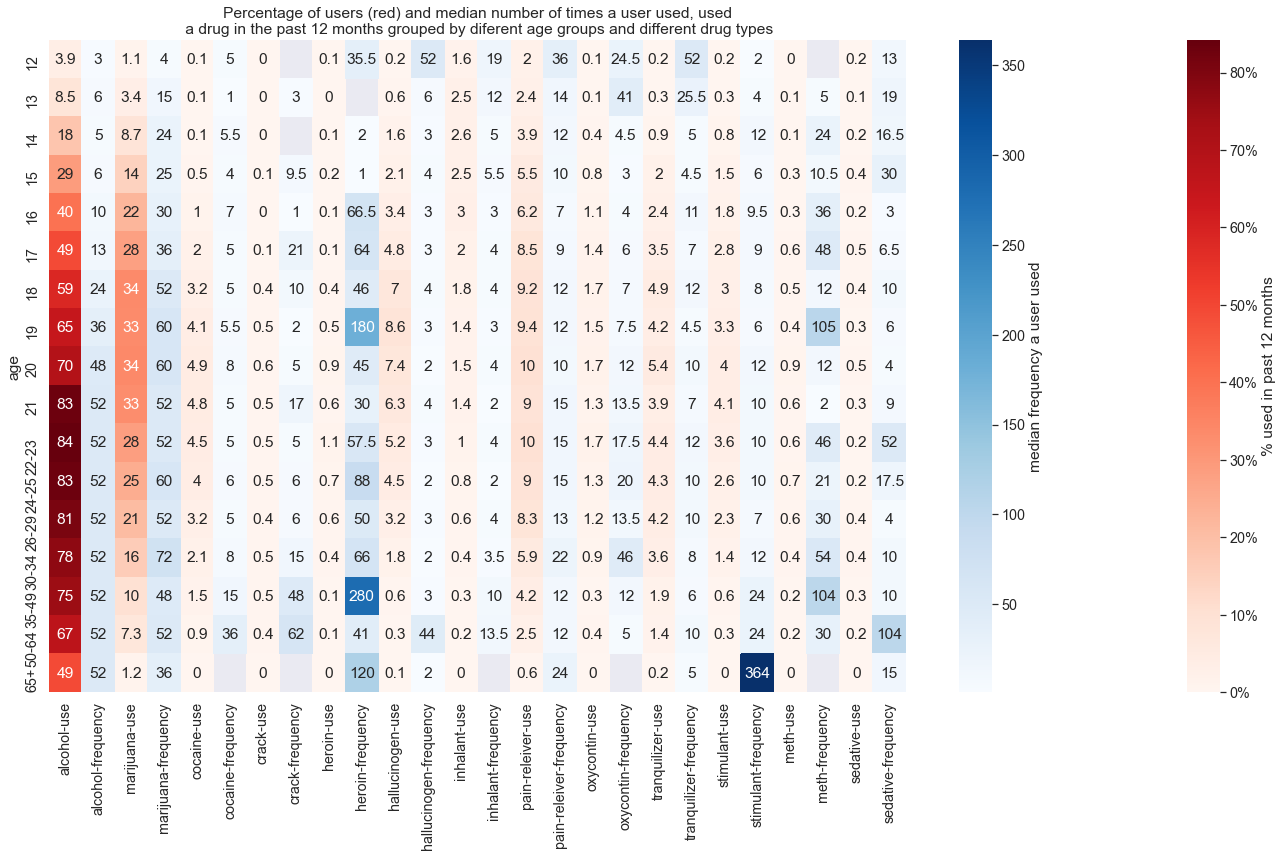

In [86]:
#Most of the code in this cell is taken from StackOverflow.com
mask = np.vstack([np.arange(df.shape[1])]* df.shape[0]) % 2

fig, axes = plt.subplots(figsize=(24, 12))

axes.set_title("Percentage of users (red) and median number of times a user used, used\n a drug in the past 12 months grouped by diferent age groups and different drug types")

plot_precentage = sb.heatmap(df, mask=mask, annot=True, cmap='Reds', ax=axes, 
                              cbar_kws={'format': '%.0f%%',
                                        'label': '% used in past 12 months'}
                             )

plot_frequency = sb.heatmap(df, mask=1-mask, annot=True, fmt='g', cmap='Blues', ax=axes,
                             cbar_kws= dict(label = 'median frequency a user used')
                            )

